# Earth Science Citation Replication Project

## 0. Import Packages

In [75]:
import csv
import pandas as pd
from time import sleep
from datetime import datetime
import re
import os
import json
import requests
import matplotlib.pyplot as plt
import numpy as np

*Be sure to either keep this notebook in the same folder as your data, or use os to change directories

In [ ]:
#os.chdir('yourDataDirectory')

## 1. Import and clean your input file:

In [91]:
#Import csv

data = pd.read_csv("master_sample.csv", encoding="ISO-8859-1")
data

,Unnamed: 0,PT,AU,BA,BE,GP,AF,BF,CA,TI,...,WC,SC,GA,UT,PM,OA,HC,HP,DA,INSTITUTION
0,1289,J,"Nusbaumer, J; Noone, D",NaN,NaN,NaN,"Nusbaumer, Jesse; Noone, David",NaN,NaN,Numerical Evaluation of the Modern and Future ...,...,Meteorology & Atmospheric Sciences,Meteorology & Atmospheric Sciences,GN9IH,WOS:000439508000007,30381797.0,"Green Accepted, Bronze",NaN,NaN,6/19/20,CUBoulder
1,1320,J,"Wagner, A; Heinzeller, D; Wagner, S; Rummler, ...",NaN,NaN,NaN,"Wagner, Andreas; Heinzeller, Dominikus; Wagner...",NaN,NaN,Explicit Convection and Scale-Aware Cumulus Pa...,...,Meteorology & Atmospheric Sciences,Meteorology & Atmospheric Sciences,GL4CL,WOS:000437094500014,NaN,Bronze,NaN,NaN,6/19/20,CUBoulder
2,1716,B,"Barry, RG; Hall-McKim, EA","Barry, RG; HallMcKim, EA",NaN,NaN,"Barry, Roger G.; Hall-McKim, Eileen A.","Barry, RG; HallMcKim, EA",NaN,"The Setting, History of Studies, and the Clima...",...,Environmental Sciences; Meteorology & Atmosphe...,Environmental Sciences & Ecology; Meteorology ...,BO7BJ,WOS:000522817700002,NaN,Bronze,NaN,NaN,6/19/20,CUBoulder
3,4787,J,"Guillod, BP; Orlowsky, B; Miralles, DG; Teulin...",NaN,NaN,NaN,"Guillod, B. P.; Orlowsky, B.; Miralles, D. G.;...",NaN,NaN,Land-surface controls on afternoon precipitati...,...,Environmental Sciences; Meteorology & Atmosphe...,Environmental Sciences & Ecology; Meteorology ...,AP3QK,WOS:000341991600008,NaN,"DOAJ Gold, Green Published",NaN,NaN,6/19/20,CUBoulder
4,245,J,"D'Ambro, EL; Schobesberger, S; Gaston, CJ; Lop...",NaN,NaN,NaN,"D'Ambro, Emma L.; Schobesberger, Siegfried; Ga...",NaN,NaN,Chamber-based insights into the factors contro...,...,Environmental Sciences; Meteorology & Atmosphe...,Environmental Sciences & Ecology; Meteorology ...,IV8BG,WOS:000484490100002,NaN,"DOAJ Gold, Green Published",NaN,NaN,6/19/20,CUBoulder
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,432,J,"Rangarajan, R; Laskar, AH; Bhattacharya, SK; S...",NaN,NaN,NaN,"Rangarajan, Ravi; Laskar, Amzad H.; Bhattachar...",NaN,NaN,An insight into the western Pacific wintertime...,...,"Engineering, Civil; Geosciences, Multidiscipli...",Engineering; Geology; Water Resources,ER5VE,WOS:000398871100009,NaN,NaN,NaN,NaN,7/16/20,Houston
996,316,J,"Ahmad, L; Khan, SD; Shah, MT; Jehan, N",NaN,NaN,NaN,"Ahmad, Laeiq; Khan, Shuhab D.; Shah, M. Tahir;...",NaN,NaN,"Gold mineralization in Bubin area, Gilgit-Balt...",...,"Geosciences, Multidisciplinary",Geology,FU1NZ,WOS:000423618000007,NaN,NaN,NaN,NaN,7/16/20,Houston
997,698,J,"Baier, BC; Brune, WH; Lefer, BL; Miller, DO; M...",NaN,NaN,NaN,"Baier, Bianca C.; Brune, William H.; Lefer, Ba...",NaN,NaN,Direct ozone production rate measurements and ...,...,NaN,NaN,NaN,WOS:000356991000010,NaN,NaN,NaN,NaN,NaN,Houston
998,839,J,"Hossain, F; Siddique-E-Akbor, AHM; Yigzaw, W; ...",NaN,NaN,NaN,"Hossain, Faisal; Siddique-E-Akbor, A. H. M.; Y...",NaN,NaN,"CROSSING THE ""VALLEY OF DEATH"" Lessons Learned...",...,NaN,NaN,NaN,WOS:000342552400008,NaN,NaN,NaN,NaN,NaN,Houston


### Data Clean up

In [92]:
#Select three columns: Cited References, DOI of paper, and Institution
citedref = data[['CR', 'DI', 'INSTITUTION']]
citedref

,CR,DI,INSTITUTION
0,"Bacmeister JT, 2018, CLIMATIC CHANGE, V146, P5...",10.1029/2017JD028081,CUBoulder
1,"Arnault J, 2016, J HYDROMETEOROL, V17, P1489, ...",10.1175/MWR-D-17-0238.1,CUBoulder
2,"AMAP, 2017, SNOW WAT IC PERM ARC; AMAP, 2011, ...",NaN,CUBoulder
3,"Aires Filipe, 2014, Journal of Climate, V27, P...",10.5194/acp-14-8343-2014,CUBoulder
4,"ATKINSON R, 1987, INT J CHEM KINET, V19, P799,...",10.5194/acp-19-11253-2019,CUBoulder
...,...,...,...
995,"Araguas-Araguas L, 2000, HYDROL PROCESS, V14, ...",10.1016/j.jhydrol.2017.01.047,Houston
996,"Ahmad L, 2016, EARTH SCI INFORM, V9, P113, DOI...",10.1007/s12517-017-3354-9,Houston
997,NaN,10.1016/j.atmosenv.2015.05.033,Houston
998,NaN,10.1175/BAMS-D-13-00176.1,Houston


For each row, take column 'CR', split it at ; and append new row, keeping DOI and Institution
*See notes later

In [93]:
citedref = (citedref.set_index(citedref.columns.drop('CR',1).tolist())
   ...:    .CR.str.split('; ', expand=True)
   ...:    .stack()
   ...:    .reset_index()
   ...:    .rename(columns={0:'CR'})
   ...:    .loc[:, citedref.columns]
   ...: )
citedref

,CR,DI,INSTITUTION
0,"Bacmeister JT, 2018, CLIMATIC CHANGE, V146, P5...",10.1029/2017JD028081,CUBoulder
1,"Bao JW, 2006, MON WEATHER REV, V134, P1063, DO...",10.1029/2017JD028081,CUBoulder
2,"Bonne JL, 2015, J GEOPHYS RES-ATMOS, V120, P29...",10.1029/2017JD028081,CUBoulder
3,"Bosilovich MG, 2015, J CLIMATE, V28, P3631, DO...",10.1029/2017JD028081,CUBoulder
4,"Coplen TB, 2008, GEOPHYS RES LETT, V35, DOI 10...",10.1029/2017JD028081,CUBoulder
...,...,...,...
55575,"Robb LJ., 2013, INTRO ORE FORMING PR",10.1007/s12517-017-3354-9,Houston
55576,"Smythe DM, 2013, MINER ENG, V52, P52, DOI 10.1...",10.1007/s12517-017-3354-9,Houston
55577,"Sweatman T, 1995, AUST AGEN INT DEV, V91",10.1007/s12517-017-3354-9,Houston
55578,"White NC, 1995, SOC EC GEOLOGISTS NE, V23, P9",10.1007/s12517-017-3354-9,Houston


#### Quickly summarize how many cited references by institution:

In [94]:
citedref_summary = citedref.groupby('INSTITUTION').count()
citedref_summary

,CR,DI
INSTITUTION,,
Berkeley,16851,15990
CUBoulder,24042,22785
Houston,1602,1602
UCLA,13085,13085


#### Does it add up?

In [95]:
citedref_summary.CR.sum()

55580

#### Yep! 

#### Now... 
Rather than trying to split the unstructured, dirty data, we'll use regex to pull out the DOI into new column:

In [96]:
citedref['citedDOI'] = citedref['CR'].str.extract('(10\.\S*[^,\s])', expand=True)[0]
citedref['citedDOI'] = citedref.citedDOI.str.rstrip(']')

In [97]:
citedref

,CR,DI,INSTITUTION,citedDOI
0,"Bacmeister JT, 2018, CLIMATIC CHANGE, V146, P5...",10.1029/2017JD028081,CUBoulder,10.1007/s10584-016-1750-x
1,"Bao JW, 2006, MON WEATHER REV, V134, P1063, DO...",10.1029/2017JD028081,CUBoulder,10.1175/MWR3123.1
2,"Bonne JL, 2015, J GEOPHYS RES-ATMOS, V120, P29...",10.1029/2017JD028081,CUBoulder,10.1002/2014JD022602
3,"Bosilovich MG, 2015, J CLIMATE, V28, P3631, DO...",10.1029/2017JD028081,CUBoulder,10.1175/JCLI-D-14-00623.1
4,"Coplen TB, 2008, GEOPHYS RES LETT, V35, DOI 10...",10.1029/2017JD028081,CUBoulder,10.1029/2008GL035481
...,...,...,...,...
55575,"Robb LJ., 2013, INTRO ORE FORMING PR",10.1007/s12517-017-3354-9,Houston,NaN
55576,"Smythe DM, 2013, MINER ENG, V52, P52, DOI 10.1...",10.1007/s12517-017-3354-9,Houston,10.1016/j.mineng.2013.03.010
55577,"Sweatman T, 1995, AUST AGEN INT DEV, V91",10.1007/s12517-017-3354-9,Houston,NaN
55578,"White NC, 1995, SOC EC GEOLOGISTS NE, V23, P9",10.1007/s12517-017-3354-9,Houston,NaN


### Export this to CSV:

In [98]:
citedref.to_csv('citedRef_master.csv', encoding='utf-8')

## Crossref

#### Rather than cleaning up the sloppy citation data, we'll use the articles' DOIs to get the journal metadata from the CrossRef API. We'll start by creating variables for the APIs url and the header we'll need to send along with it.

*Note: insert you're own email into the header* 

In [99]:
url = 'http://api.crossref.org/works/'
header = {'User-Agent': 'EarthSciCitations (https://github.com/samteplitzky/Earth-Science-Citation-Replication-Project; mailto:steplitz@berkeley.edu)'}

Now we'll use requests to send a query for each DOI to the CrossRef API. this will get the article metadata from CrossRef, write to new csv.

*This takes a loooooooooong time to run!. Best to execute at the end of your work day. Should be completed by tomorrow. It took ten hours when I ran it.*

In [101]:
timestamp=datetime.timestamp(datetime.now())
print('start time: ',datetime.fromtimestamp(timestamp))
with open('citedRefsMeta.csv', 'w', newline='', encoding='utf-8') as f:
    writer = csv.writer(f)
    writer.writerow(['Inst','citingDOI','CR','citedDOI', 'title', 'journal_book', 'date','issn1', 'issn1Type', 'issn2', 'issn2Type', 'isbn'])
    for i, row in citedref.iterrows():
        sleep(.2)
        if pd.notna(row['citedDOI']):
            query = url+row['citedDOI']
            #print(query)
            response = requests.get(query, headers=header)
            if response.status_code == 200:
                data = json.loads(response.content.decode('utf-8'))
                
                if 'container-title' in data['message']:
                    journal = data['message']['container-title']
                    if len(journal) > 0:
                        journal = journal[0]
                    else: journal = 'nan'                    
                else:
                    journal='nan'
                    
                year = data['message']['created']['date-parts'][0][0]
                
                if 'title' in data['message']:
                    title = data['message']['title']
                    if len(title) > 0:
                        title = title[0]
                    else:
                        title = 'nan'
                else:
                    title='nan'
                    
                if 'ISBN' in data['message']:                     
                    isbn = data['message']['ISBN'][0]
                    
                    writer.writerow([row['INSTITUTION'], row['DI'], row['CR'], row['citedDOI'], title, journal, year, 'nan', 'nan', 'nan', 'nan', isbn])
                else:
                    
                    if 'ISSN' in data['message']:
                        issn1 = data['message']['issn-type'][0]['value']
                        issn1Type = data['message']['issn-type'][0]['type']
                        
                        if len(data['message']['issn-type'])>1:
                            issn2 = data['message']['issn-type'][1]['value']
                            issn2Type = data['message']['issn-type'][1]['type']
                            writer.writerow([row['INSTITUTION'], row['DI'], row['CR'], row['citedDOI'], title, journal, year, issn1, issn1Type, issn2, issn2Type,'nan'])
                        
                        else:
                            writer.writerow([row['INSTITUTION'], row['DI'], row['CR'], row['citedDOI'], title, journal, year, issn1, issn1Type, 'nan', 'nan','nan'])
                    else:
                        writer.writerow([row['INSTITUTION'], row['DI'], row['CR'], row['citedDOI'], title, journal, year, 'nan', 'nan', 'nan', 'nan','nan'])
            else:
                writer.writerow([row['INSTITUTION'], row['DI'], row['CR'], row['citedDOI'],'nan','nan', 'nan', 'nan', 'nan', 'nan', 'nan','nan'])
        else:
            writer.writerow([row['INSTITUTION'], row['DI'], row['CR'], row['citedDOI'], 'nan','nan','nan', 'nan', 'nan', 'nan', 'nan','nan'])

timestamp=datetime.timestamp(datetime.now())
print('end time: ',datetime.fromtimestamp(timestamp))

start time:  2020-07-22 18:57:46.605824
end time:  2020-07-23 05:42:16.779777


## All done? Yay, good morning!
read in the new citedRefsMeta.csv file to a pandas dataframe:

In [130]:
citedRefsMeta = pd.read_csv('citedRefsMeta.csv', encoding='utf-8')

In [131]:
citedRefsMeta

,Inst,citingDOI,CR,citedDOI,title,journal_book,date,issn1,issn1Type,issn2,issn2Type,isbn
0,CUBoulder,10.1029/2017JD028081,"Bacmeister JT, 2018, CLIMATIC CHANGE, V146, P5...",10.1007/s10584-016-1750-x,Projected changes in tropical cyclone activity...,Climatic Change,2016.0,0165-0009,print,1573-1480,electronic,NaN
1,CUBoulder,10.1029/2017JD028081,"Bao JW, 2006, MON WEATHER REV, V134, P1063, DO...",10.1175/MWR3123.1,Interpretation of Enhanced Integrated Water Va...,Monthly Weather Review,2006.0,0027-0644,print,1520-0493,electronic,NaN
2,CUBoulder,10.1029/2017JD028081,"Bonne JL, 2015, J GEOPHYS RES-ATMOS, V120, P29...",10.1002/2014JD022602,The summer 2012 Greenland heat wave: In situ a...,Journal of Geophysical Research: Atmospheres,2015.0,2169-897X,print,NaN,NaN,NaN
3,CUBoulder,10.1029/2017JD028081,"Bosilovich MG, 2015, J CLIMATE, V28, P3631, DO...",10.1175/JCLI-D-14-00623.1,Evaluating Observation Influence on Regional W...,Journal of Climate,2015.0,0894-8755,print,1520-0442,electronic,NaN
4,CUBoulder,10.1029/2017JD028081,"Coplen TB, 2008, GEOPHYS RES LETT, V35, DOI 10...",10.1029/2008GL035481,Extreme changes in stable hydrogen isotopes an...,Geophysical Research Letters,2008.0,0094-8276,print,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
55575,Houston,10.1007/s12517-017-3354-9,"Robb LJ., 2013, INTRO ORE FORMING PR",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55576,Houston,10.1007/s12517-017-3354-9,"Smythe DM, 2013, MINER ENG, V52, P52, DOI 10.1...",10.1016/j.mineng.2013.03.010,Rare Earth Element deportment studies utilisin...,Minerals Engineering,2013.0,0892-6875,print,NaN,NaN,NaN
55577,Houston,10.1007/s12517-017-3354-9,"Sweatman T, 1995, AUST AGEN INT DEV, V91",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55578,Houston,10.1007/s12517-017-3354-9,"White NC, 1995, SOC EC GEOLOGISTS NE, V23, P9",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Isolate Journal and Book Titles

In [132]:
citedRefsMeta['journal_book']

0                                     Climatic Change
1                              Monthly Weather Review
2        Journal of Geophysical Research: Atmospheres
3                                  Journal of Climate
4                        Geophysical Research Letters
                             ...                     
55575                                             NaN
55576                            Minerals Engineering
55577                                             NaN
55578                                             NaN
55579                            Geoscience Frontiers
Name: journal_book, Length: 55580, dtype: object

**Follow up**: You may notice the appears of Nan or null values in the 'journal_book' column. We will ignore these for now, but note how many there are for future data clean up.

In [133]:
citedRefsMeta['journal_book'].isna().sum()

11280

In [134]:
citedRefsMeta['citedDOI'].isna().sum()

10635

#### Take Counts for each title

The following five cells leads you through the steps needed to visualize the 80/20 rule (do 80% of citations come from 20% of titles). You will:
- count the number of times a journal title is cited
- create a cumulative summation of the counts
- calculate the title percent (each additional title is what percent of the total?)
- calculate the citation percent (each title accounts for what percent of total citations?)

In [135]:
citedRefsMeta_count = citedRefsMeta['journal_book'].value_counts().rename_axis('journal_book').reset_index(name='counts')
citedRefsMeta_count

,journal_book,counts
0,Journal of Geophysical Research,2509
1,Geophysical Research Letters,2451
2,Atmospheric Chemistry and Physics,1310
3,Journal of Climate,1241
4,Science,1225
...,...,...
2710,Pastoralism,1
2711,Journal of Colloid Science,1
2712,COMPEL - The international journal for computa...,1
2713,The Geophysics of Sea Ice,1


In [136]:
citedRefsMeta_count['cumsum'] = citedRefsMeta_count['counts'].cumsum()
citedRefsMeta_count

,journal_book,counts,cumsum
0,Journal of Geophysical Research,2509,2509
1,Geophysical Research Letters,2451,4960
2,Atmospheric Chemistry and Physics,1310,6270
3,Journal of Climate,1241,7511
4,Science,1225,8736
...,...,...,...
2710,Pastoralism,1,44296
2711,Journal of Colloid Science,1,44297
2712,COMPEL - The international journal for computa...,1,44298
2713,The Geophysics of Sea Ice,1,44299


In [137]:
citedRefsMeta_count['titlenum'] = range(1, 1+len(citedRefsMeta_count))
citedRefsMeta_count

,journal_book,counts,cumsum,titlenum
0,Journal of Geophysical Research,2509,2509,1
1,Geophysical Research Letters,2451,4960,2
2,Atmospheric Chemistry and Physics,1310,6270,3
3,Journal of Climate,1241,7511,4
4,Science,1225,8736,5
...,...,...,...,...
2710,Pastoralism,1,44296,2711
2711,Journal of Colloid Science,1,44297,2712
2712,COMPEL - The international journal for computa...,1,44298,2713
2713,The Geophysics of Sea Ice,1,44299,2714


In [139]:
citedRefsMeta_count['titlepct'] = 100*(citedRefsMeta_count.titlenum/2715)
citedRefsMeta_count

,journal_book,counts,cumsum,titlenum,titlepct
0,Journal of Geophysical Research,2509,2509,1,0.036832
1,Geophysical Research Letters,2451,4960,2,0.073665
2,Atmospheric Chemistry and Physics,1310,6270,3,0.110497
3,Journal of Climate,1241,7511,4,0.147330
4,Science,1225,8736,5,0.184162
...,...,...,...,...,...
2710,Pastoralism,1,44296,2711,99.852670
2711,Journal of Colloid Science,1,44297,2712,99.889503
2712,COMPEL - The international journal for computa...,1,44298,2713,99.926335
2713,The Geophysics of Sea Ice,1,44299,2714,99.963168


In [140]:
citedRefsMeta_count['citationpct'] = 100*citedRefsMeta_count['cumsum']/(44300)
citedRefsMeta_count

,journal_book,counts,cumsum,titlenum,titlepct,citationpct
0,Journal of Geophysical Research,2509,2509,1,0.036832,5.663657
1,Geophysical Research Letters,2451,4960,2,0.073665,11.196388
2,Atmospheric Chemistry and Physics,1310,6270,3,0.110497,14.153499
3,Journal of Climate,1241,7511,4,0.147330,16.954853
4,Science,1225,8736,5,0.184162,19.720090
...,...,...,...,...,...,...
2710,Pastoralism,1,44296,2711,99.852670,99.990971
2711,Journal of Colloid Science,1,44297,2712,99.889503,99.993228
2712,COMPEL - The international journal for computa...,1,44298,2713,99.926335,99.995485
2713,The Geophysics of Sea Ice,1,44299,2714,99.963168,99.997743


## Plot 80/20 rule

The cell below will tell you what percent of titles are represented by 80% of the total citations?

In [141]:
ind=np.argmin(abs(80.-citedRefsMeta_count.citationpct))
pctile = citedRefsMeta_count.titlepct[ind]
pctile

7.8821362799263355

Plot 80/20 rule using the code below:

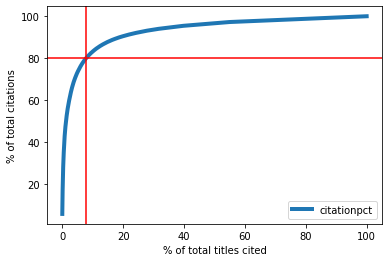

In [142]:
newlines = citedRefsMeta_count.plot.line(x='titlepct', y='citationpct', linewidth=4)
newlines.axhline(y=80, color='r')
newlines.axvline(x=pctile, color='r')
newlines.set_ylabel('% of total citations')
newlines.set_xlabel('% of total titles cited')
plt.show()

## Plot 80/20 rule for your institution

Repeat the steps above to plot the 80/20 for your institution. Create a new dataframe for your institution. Then substitute a term for your institution in the place of "ucb" or Berkeley as needed.

In [143]:
#Example
citedRefsMeta_ucb = citedRefsMeta.loc[citedRefsMeta['Inst'] == 'Berkeley']
citedRefsMeta_ucb

,Inst,citingDOI,CR,citedDOI,title,journal_book,date,issn1,issn1Type,issn2,issn2Type,isbn
24042,Berkeley,10.1061/(ASCE)GT.1943-5606.0001833,"Abrahamson N., 2013, 201304 PEER U CAL, P143",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24043,Berkeley,10.1061/(ASCE)GT.1943-5606.0001833,"Abrahamson N, 2016, EARTHQ SPECTRA, V32, P23, ...",10.1193/051712EQS188MR,BC Hydro Ground Motion Prediction Equations fo...,Earthquake Spectra,2015.0,8755-2930,print,1944-8201,electronic,NaN
24044,Berkeley,10.1061/(ASCE)GT.1943-5606.0001833,"Ancheta T.D., 2013, 201303 PEER U CAL",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
24045,Berkeley,10.1061/(ASCE)GT.1943-5606.0001833,"Ashford SA, 2002, J GEOTECH GEOENVIRON, V128, ...",10.1061/(ASCE)1090-0241(2002)128:2(119),Simplified Method for Evaluating Seismic Stabi...,Journal of Geotechnical and Geoenvironmental E...,2002.0,1090-0241,print,1943-5606,electronic,NaN
24046,Berkeley,10.1061/(ASCE)GT.1943-5606.0001833,"Atkinson GM, 2003, B SEISMOL SOC AM, V93, P170...",10.1785/0120020156,Empirical Ground-Motion Relations for Subducti...,Bulletin of the Seismological Society of America,2005.0,0037-1106,print,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
40888,Berkeley,10.1016/j.marpetgeo.2014.07.024,"WINTERS WJ, 1999, GEOLOGICAL SURVEY CA, V544, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40889,Berkeley,10.1016/j.marpetgeo.2014.07.024,"WINTERS WJ, 2006, P ODP SCI RESULTS, V204, P1",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40890,Berkeley,10.1016/j.marpetgeo.2014.07.024,"WINTERS WJ, 2000, P OCEAN DRILLING PRO, V164, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40891,Berkeley,10.1016/j.marpetgeo.2014.07.024,"Xu WY, 1999, J GEOPHYS RES-SOL EA, V104, P5081...",10.1029/1998JB900092,"Predicting the occurrence, distribution, and e...",Journal of Geophysical Research: Solid Earth,2002.0,0148-0227,print,NaN,NaN,NaN


In [144]:
citedRefsMeta_ucb_count = citedRefsMeta_ucb['journal_book'].value_counts().rename_axis('journal_book').reset_index(name='counts')
citedRefsMeta_ucb_count

,journal_book,counts
0,Journal of Geophysical Research,547
1,Geophysical Research Letters,471
2,Earth and Planetary Science Letters,339
3,Science,324
4,Nature,321
...,...,...
1590,Mechanisms of Development,1
1591,European Journal of Organic Chemistry,1
1592,The Journal of Organic Chemistry,1
1593,Antarctic Science,1


In [145]:
citedRefsMeta_ucb_count['cumsum'] = citedRefsMeta_ucb_count['counts'].cumsum()
citedRefsMeta_ucb_count

,journal_book,counts,cumsum
0,Journal of Geophysical Research,547,547
1,Geophysical Research Letters,471,1018
2,Earth and Planetary Science Letters,339,1357
3,Science,324,1681
4,Nature,321,2002
...,...,...,...
1590,Mechanisms of Development,1,12975
1591,European Journal of Organic Chemistry,1,12976
1592,The Journal of Organic Chemistry,1,12977
1593,Antarctic Science,1,12978


In [146]:
citedRefsMeta_ucb_count['titlenum'] = range(1, 1+len(citedRefsMeta_ucb_count))
citedRefsMeta_ucb_count

,journal_book,counts,cumsum,titlenum
0,Journal of Geophysical Research,547,547,1
1,Geophysical Research Letters,471,1018,2
2,Earth and Planetary Science Letters,339,1357,3
3,Science,324,1681,4
4,Nature,321,2002,5
...,...,...,...,...
1590,Mechanisms of Development,1,12975,1591
1591,European Journal of Organic Chemistry,1,12976,1592
1592,The Journal of Organic Chemistry,1,12977,1593
1593,Antarctic Science,1,12978,1594


In [148]:
#substitute your title number for "1595"
citedRefsMeta_ucb_count['titlepct'] = 100*(citedRefsMeta_ucb_count.titlenum/1595)
citedRefsMeta_ucb_count

,journal_book,counts,cumsum,titlenum,titlepct
0,Journal of Geophysical Research,547,547,1,0.062696
1,Geophysical Research Letters,471,1018,2,0.125392
2,Earth and Planetary Science Letters,339,1357,3,0.188088
3,Science,324,1681,4,0.250784
4,Nature,321,2002,5,0.313480
...,...,...,...,...,...
1590,Mechanisms of Development,1,12975,1591,99.749216
1591,European Journal of Organic Chemistry,1,12976,1592,99.811912
1592,The Journal of Organic Chemistry,1,12977,1593,99.874608
1593,Antarctic Science,1,12978,1594,99.937304


In [150]:
#substitute your total citations for 12979

citedRefsMeta_ucb_count['citationpct'] = 100*citedRefsMeta_ucb_count['cumsum']/(12979)
citedRefsMeta_ucb_count

,journal_book,counts,cumsum,titlenum,titlepct,citationpct
0,Journal of Geophysical Research,547,547,1,0.062696,4.214500
1,Geophysical Research Letters,471,1018,2,0.125392,7.843439
2,Earth and Planetary Science Letters,339,1357,3,0.188088,10.455351
3,Science,324,1681,4,0.250784,12.951691
4,Nature,321,2002,5,0.313480,15.424917
...,...,...,...,...,...,...
1590,Mechanisms of Development,1,12975,1591,99.749216,99.969181
1591,European Journal of Organic Chemistry,1,12976,1592,99.811912,99.976886
1592,The Journal of Organic Chemistry,1,12977,1593,99.874608,99.984590
1593,Antarctic Science,1,12978,1594,99.937304,99.992295


In [151]:
ind=np.argmin(abs(80.-citedRefsMeta_ucb_count.citationpct))
pctile_ucb = citedRefsMeta_ucb_count.titlepct[ind]
pctile_ucb

16.99059561128527

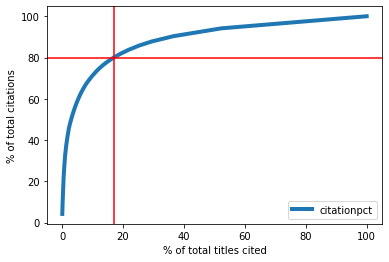

In [152]:
ucblines = citedRefsMeta_ucb_count.plot.line(x='titlepct', y='citationpct', linewidth=4)
ucblines.axhline(y=80, color='r')
ucblines.axvline(x=pctile_ucb, color='r')
ucblines.set_ylabel('% of total citations')
ucblines.set_xlabel('% of total titles cited')
plt.show()

Plot your institution vs the entire group:

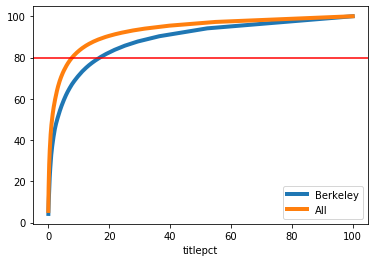

In [154]:
ax = citedRefsMeta_ucb_count.plot(x='titlepct', y='citationpct', linewidth=4, label = 'Berkeley')
citedRefsMeta_count.plot(ax=ax, x='titlepct', y='citationpct', linewidth=4, label = 'All').axhline(y=80, color='r')

### Notes and some references:

*Note: on splitting & stacking method*  
For each row, take column 'CR', split it at ; and append new row, keeping DOI and Institution
https://stackoverflow.com/questions/12680754/split-explode-pandas-dataframe-string-entry-to-separate-rows
https://gist.github.com/jlln/338b4b0b55bd6984f883